<H3>Global Model-Agnostic Methods</H3>
<p>Global methods describe the average behaviour of a machine learning model. They are often expressed as expected values based on distribution of data</p>
<ul>
    <li>PDP, partial dependence plot is a feature effect method</li>
    <li>the method can be used in both classification and regression problems</li>
    <li><b>PDP assumption</b> is that target feature S is not correlated to any other features in feature space</li>
</ul>

In [3]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from lib.process_data import process_bike

In [9]:
# loading bike data
cols_df, bike_df = process_bike("./data/bike.csv")
feature_cols = cols_df.loc[cols_df.input.isin(['num']),'cols'].to_list()
resp = 'cnt'
X = bike_df[feature_cols].to_numpy()
y = bike_df[resp].to_numpy()

convert yr to string


In [11]:
# loading bike model
bike_model = loaded_model = pickle.load(open("./model/bike_lasso.sav",'rb'))
bike_model.coef_
y_pred = bike_model.predict(X)
result_df = pd.DataFrame(data=np.vstack([y,y_pred]).transpose(), columns=['actual','pred'])

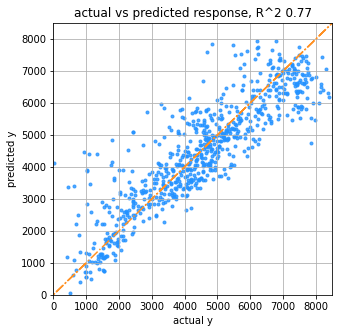

In [49]:
# plotting predicted and actual response
# reference: https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.scatter.html
# reference of markers: https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle
from sklearn.metrics import r2_score
f,ax = plt.subplots(figsize=(5,5))
ax.scatter(y, y_pred, color="#2492ff", alpha=0.8, marker=".")
ax.plot(y,y, color="#ff9124", alpha=1, linestyle='-.')
ax.set_xlim(xmin=0, xmax=8500)
ax.set_ylim(ymin=0, ymax=8500)
ax.set_xlabel("actual y")
ax.set_ylabel("predicted y")
ax.set_title(f"actual vs predicted response, R^2 {np.round(r2_score(y,y_pred),2)}")
ax.grid(True)

In [ ]:
# https://towardsdatascience.com/pitfalls-to-avoid-while-interpreting-machine-learning-pdp-ice-case-c63eeb596590
# https://www.kaggle.com/code/satyads/how-not-to-interpret-a-partial-dependence-plot?scriptVersionId=46333836